# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
plt.style.use("seaborn-colorblind")

# Cargando los datos

In [2]:
pib = pd.read_excel("Indicadores Colombia.xlsx", sheet_name="PIB", index_col="Periodo")
pib.head()

,PIB,Delta_PIB,Formacion_Capital,Delta_Formacion,Exportaciones,Delta_Expo,Importaciones,Delta_Import
Periodo,,,,,,,,
2005,514853.000133,NaN,86720.000039,NaN,88124.999507,NaN,78708.000722,NaN
2006,549435.000000,6.716869,101405.000000,16.933810,96513.000000,9.518298,92625.000000,17.681810
2007,586457.000000,6.738195,117424.000000,15.797051,102516.000000,6.219887,105461.000000,13.858030
2008,605713.000000,3.283446,128090.000000,9.083322,104604.000000,2.036755,118656.000000,12.511734
2009,612616.000000,1.139649,120026.000000,-6.295573,99158.000000,-5.206302,108395.000000,-8.647687


In [3]:
desempleo = pd.read_excel("Indicadores Colombia.xlsx", sheet_name="Desempleo", index_col="Periodo")
desempleo.head()

,Poblacion,PET,Delta_PET,PEA,Delta_PEA,Desocupados,Delta_Desoc
Periodo,,,,,,,
2001,39672.562000,29714.737250,74.899541,18555.894833,62.444563,2779.097667,14.978454
2002,40177.166000,30260.882083,75.318162,18837.230583,62.250327,2930.795833,15.556973
2003,40680.358417,30817.199250,75.754044,19355.200500,62.804175,2726.342167,14.095354
2004,41183.046250,31377.364500,76.189568,19285.403583,61.465134,2631.891667,13.643446
2005,41686.053417,31935.828917,76.609941,19328.509917,60.520986,2279.981333,11.808729


In [4]:
inflacion = pd.read_excel("Indicadores Colombia.xlsx", sheet_name="Inflacion", index_col="Periodo")
inflacion.head()

,Meta,Inflacion,Inflacion_a,Inflacion_p,TRM,Dev_nom,Dev_real
Periodo,,,,,,,
2000,10.0,8.7482,8.919318,11.041018,2229.18,18.97,6.743376
2001,8.0,7.6464,6.477613,6.930345,2291.18,2.78,-5.111865
2002,6.0,6.9928,5.415198,9.275289,2864.79,25.04,13.765769
2003,5.5,6.4906,6.977792,5.724864,2778.21,-3.02,4.305516
2004,5.5,5.4975,5.476634,4.644012,2389.75,-13.98,-10.897975


In [5]:
tasa_interes = pd.read_excel("Indicadores Colombia.xlsx", sheet_name="Tasa_de_interes",index_col="Periodo")
tasa_interes.head()

,Tasa_inter,Consumo,Comercial,Hipotecario,TES1,TES5,TES7
Periodo,,,,,,,
2000,12.00,28.765822,16.731531,22.243660,n.d.,n.d.,n.d.
2001,8.50,33.566221,17.699621,20.456101,n.d.,n.d.,n.d.
2002,5.25,28.448338,13.387775,19.738011,n.d.,n.d.,n.d.
2003,7.25,27.052717,12.903114,20.613778,10.171032,14.847246,15.501484
2004,6.50,26.002992,12.703866,19.110237,9.221496,13.07704,14.569205


## Uniendo los datos

In [10]:
pib_desempleo = pd.merge(pib,desempleo, on= "Periodo")

In [11]:
inflacion_interes = pd.merge(inflacion,tasa_interes, on= "Periodo")

In [14]:
datos_colombia = pd.merge(pib_desempleo, inflacion_interes, on = "Periodo")
datos_colombia.head()

,PIB,Delta_PIB,Formacion_Capital,Delta_Formacion,Exportaciones,Delta_Expo,Importaciones,Delta_Import,Poblacion,PET,...,TRM,Dev_nom,Dev_real,Tasa_inter,Consumo,Comercial,Hipotecario,TES1,TES5,TES7
Periodo,,,,,,,,,,,,,,,,,,,,,
2005,514853.000133,NaN,86720.000039,NaN,88124.999507,NaN,78708.000722,NaN,41686.053417,31935.828917,...,2284.22,-4.42,-2.500083,6.0,24.155696,11.971218,17.890591,7.051123,10.089706,11.746452
2006,549435.000000,6.716869,101405.000000,16.933810,96513.000000,9.518298,92625.000000,17.681810,42186.247750,32483.775083,...,2238.79,-1.99,0.123161,7.5,20.545968,10.981802,14.890885,7.429229,8.894012,9.156731
2007,586457.000000,6.738195,117424.000000,15.797051,102516.000000,6.219887,105461.000000,13.858030,42689.707417,33039.233667,...,2014.76,-10.01,-0.658179,9.5,22.288488,13.477147,15.125700,9.245073,10.068595,10.002364
2008,605713.000000,3.283446,128090.000000,9.083322,104604.000000,2.036755,118656.000000,12.511734,43196.110167,33597.449417,...,2243.59,11.36,-2.737085,9.5,25.737836,15.325594,16.782998,10.455111,11.785018,11.872074
2009,612616.000000,1.139649,120026.000000,-6.295573,99158.000000,-5.206302,108395.000000,-8.647687,43705.691500,34154.698083,...,2044.23,-8.89,-2.746661,3.5,23.215185,11.530802,15.362082,5.935673,8.583705,9.539275


In [65]:
datos_colombia["pib_percapita"] = datos_colombia["PIB"]/datos_colombia["Poblacion"]
datos_colombia.head()

,PIB,Delta_PIB,Formacion_Capital,Delta_Formacion,Exportaciones,Delta_Expo,Importaciones,Delta_Import,Poblacion,PET,...,Dev_nom,Dev_real,Tasa_inter,Consumo,Comercial,Hipotecario,TES1,TES5,TES7,pib_percapita
Periodo,,,,,,,,,,,,,,,,,,,,,
2005,514853.000133,NaN,86720.000039,NaN,88124.999507,NaN,78708.000722,NaN,41686.053417,31935.828917,...,-4.42,-2.500083,6.0,24.155696,11.971218,17.890591,7.051123,10.089706,11.746452,12.350725
2006,549435.000000,6.716869,101405.000000,16.933810,96513.000000,9.518298,92625.000000,17.681810,42186.247750,32483.775083,...,-1.99,0.123161,7.5,20.545968,10.981802,14.890885,7.429229,8.894012,9.156731,13.024031
2007,586457.000000,6.738195,117424.000000,15.797051,102516.000000,6.219887,105461.000000,13.858030,42689.707417,33039.233667,...,-10.01,-0.658179,9.5,22.288488,13.477147,15.125700,9.245073,10.068595,10.002364,13.737667
2008,605713.000000,3.283446,128090.000000,9.083322,104604.000000,2.036755,118656.000000,12.511734,43196.110167,33597.449417,...,11.36,-2.737085,9.5,25.737836,15.325594,16.782998,10.455111,11.785018,11.872074,14.022397
2009,612616.000000,1.139649,120026.000000,-6.295573,99158.000000,-5.206302,108395.000000,-8.647687,43705.691500,34154.698083,...,-8.89,-2.746661,3.5,23.215185,11.530802,15.362082,5.935673,8.583705,9.539275,14.016847


## Calculando estimadores de locación
* Media
* Mediana
* Moda
* Media Ponderada (de ser necesario)

In [84]:
#PIB
from statistics import mode

print("Media del PIB de Colombia:", np.mean(datos_colombia["PIB"]))
print("Mediana del PIB de Colombia:", np.median(datos_colombia["PIB"]))
print("Moda del PIB de Colombia:", mode(datos_colombia["PIB"]))

Media del PIB de Colombia: 715734.9026787595
Mediana del PIB de Colombia: 729677.0
Moda del PIB de Colombia: 514853.000133183


## Algunos gráficos interesantes

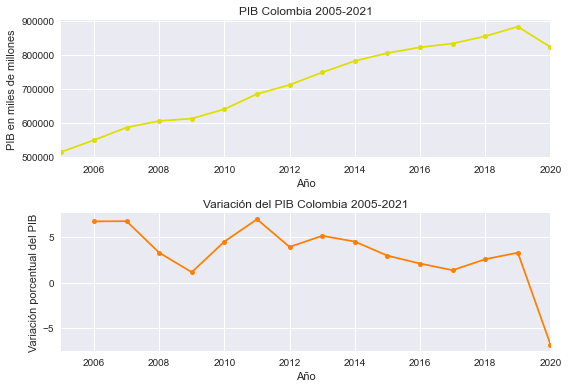

In [78]:
fig1,axes1 = plt.subplots(nrows = 2, ncols=1)

axes1[0].plot("PIB", data=datos_colombia, marker = 'o', ms = 5, color = '#dede00')
axes1[0].set_title("PIB Colombia 2005-2021")
axes1[0].set_xlabel("Año")
axes1[0].set_xlim([2005,2020])
axes1[0].set_ylabel("PIB en miles de millones")


axes1[1].plot("Delta_PIB", data=datos_colombia, marker = 'o', ms = 5, color = '#ff7f00')
axes1[1].set_title("Variación del PIB Colombia 2005-2021")
axes1[1].set_xlabel("Año")
axes1[1].set_xlim([2005,2020])
axes1[1].set_ylabel("Variación porcentual del PIB")

plt.tight_layout()

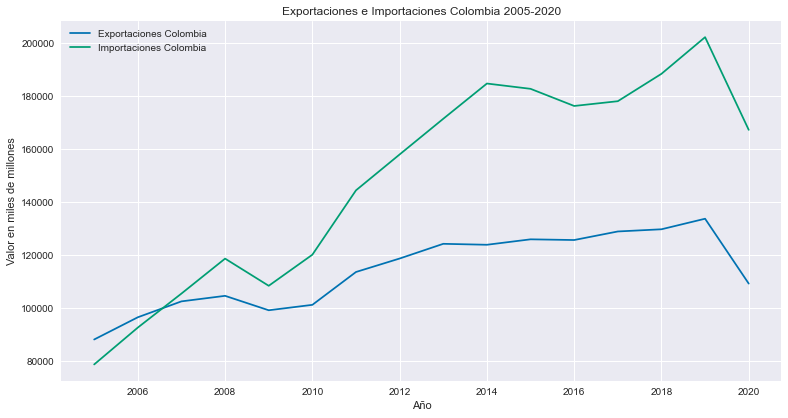

In [62]:
fig2 = plt.figure(figsize=(10,5))

axes2 = fig2.add_axes([0,0,1,1])

axes2.plot("Exportaciones", data = datos_colombia, label = "Exportaciones Colombia")
axes2.plot("Importaciones", data = datos_colombia, label = "Importaciones Colombia")
axes2.set_title("Exportaciones e Importaciones Colombia 2005-2020")
axes2.set_xlabel("Año")
axes2.set_ylabel("Valor en miles de millones")
plt.legend()

In [63]:
datos_colombia.head()

,PIB,Delta_PIB,Formacion_Capital,Delta_Formacion,Exportaciones,Delta_Expo,Importaciones,Delta_Import,Poblacion,PET,...,TRM,Dev_nom,Dev_real,Tasa_inter,Consumo,Comercial,Hipotecario,TES1,TES5,TES7
Periodo,,,,,,,,,,,,,,,,,,,,,
2005,514853.000133,NaN,86720.000039,NaN,88124.999507,NaN,78708.000722,NaN,41686.053417,31935.828917,...,2284.22,-4.42,-2.500083,6.0,24.155696,11.971218,17.890591,7.051123,10.089706,11.746452
2006,549435.000000,6.716869,101405.000000,16.933810,96513.000000,9.518298,92625.000000,17.681810,42186.247750,32483.775083,...,2238.79,-1.99,0.123161,7.5,20.545968,10.981802,14.890885,7.429229,8.894012,9.156731
2007,586457.000000,6.738195,117424.000000,15.797051,102516.000000,6.219887,105461.000000,13.858030,42689.707417,33039.233667,...,2014.76,-10.01,-0.658179,9.5,22.288488,13.477147,15.125700,9.245073,10.068595,10.002364
2008,605713.000000,3.283446,128090.000000,9.083322,104604.000000,2.036755,118656.000000,12.511734,43196.110167,33597.449417,...,2243.59,11.36,-2.737085,9.5,25.737836,15.325594,16.782998,10.455111,11.785018,11.872074
2009,612616.000000,1.139649,120026.000000,-6.295573,99158.000000,-5.206302,108395.000000,-8.647687,43705.691500,34154.698083,...,2044.23,-8.89,-2.746661,3.5,23.215185,11.530802,15.362082,5.935673,8.583705,9.539275
